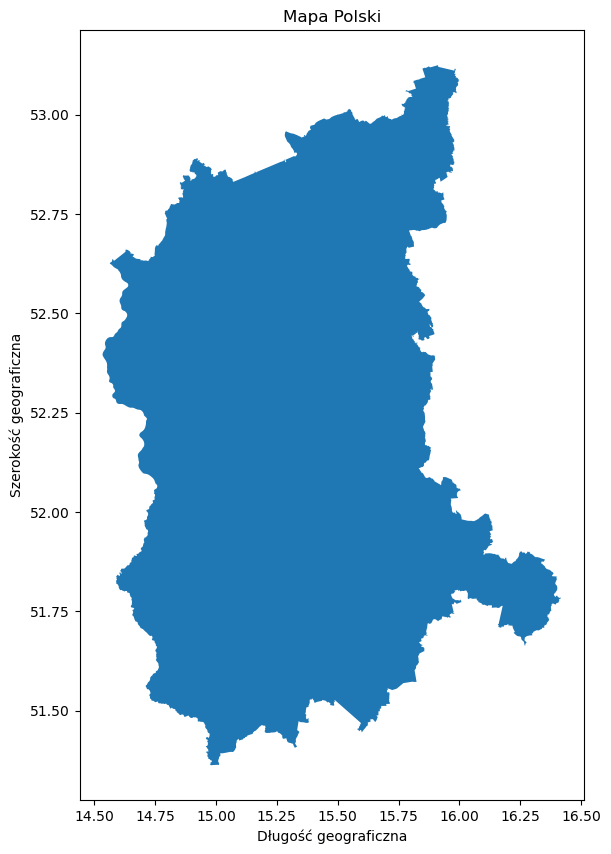

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from shapely.geometry import Point
from haversine import haversine, Unit
from matplotlib.colors import Normalize
from matplotlib import cm
import skgstat as skg

# Ścieżka do folderu zawierającego pliki SHP
folder_path = "Lubuskie"

# Lista do przechowywania obiektów GeoDataFrame
gdfs = []
i = 1

# Iteracja przez pliki w folderze
for filename in os.listdir(folder_path):
    if filename.endswith(".shp"):
        # Wczytaj plik SHP
        filepath = os.path.join(folder_path, filename)
        gdf = gpd.read_file(filepath)
        
        # Sprawdź czy geometria to POLYGON
        if 'Polygon' in gdf.geom_type.unique():
            # Dodaj do listy tylko jeśli to POLYGON
            gdfs.append(gdf)

# Połącz wszystkie GeoDataFrame w jeden
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
from pyproj import CRS, Transformer

# Zdefiniuj obecny układ współrzędnych
obecny_uklad = CRS(merged_gdf.crs)

# Zdefiniuj układ docelowy (WGS84)
uklad_docelowy = CRS("EPSG:4326")

# Utwórz transformator między układami współrzędnych
transformer = Transformer.from_crs(obecny_uklad, uklad_docelowy)

# Przelicz współrzędne dla wszystkich geometrii w GeoDataFrame
merged_gdf['geometry'] = merged_gdf['geometry'].to_crs(uklad_docelowy)

# Zapisz przeliczone dane do nowego pliku SHP
plik_wgs84 = "Lubuskie/Lubuskie_wgs84.shp"
merged_gdf.to_file(plik_wgs84)
# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax)  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# Dodaj tytuł i etykiety
plt.title("Mapa Polski")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświetl mapę
plt.show()

In [15]:
# Wczytaj pierwszy plik CSV
plik1 = "Data/o3.csv"
df_o3 = pd.read_csv(plik1)
df_o3 = df_o3[(df_o3['Rok'] == 2021) & (df_o3['Czas uśredniania'] == 1)]

# Wczytaj drugi plik CSV
plik2 = "Data/pm25.csv"
df_pm25 = pd.read_csv(plik2)
df_pm25 = df_pm25[(df_pm25['Rok'] == 2021) & (df_pm25['Czas uśredniania'] == 1)]
wartosc_Gubin_pm25=df_pm25['Średnia'].values[0]
wartosc_Wschowa_pm25=df_pm25['Średnia'].values[1]
wartosc_Zary_pm25=df_pm25['Średnia'].values[2]
wartosc_Miedz_pm25=25.8
wartosc_Gorzow_pm25=23.1
wartosc_ZG_pm25=18.2
wartosc_Wschowa_o3=df_o3['Średnia'].values[0]
wartosc_Zary_o3=df_o3['Średnia'].values[1]

In [16]:
punkty_pm25 = {
    'Nazwa': ['Gubin_pm25','Wschowa_pm25', 'Zary_pm25', 'Miedz_pm25', 'Gorzow_pm25', 'ZG_pm25'],
    'Long': [14.724068286506554, 16.317500, 15.127808, 15.56561304016405, 15.229592971164104, 15.518495934448795],
    'Latt': [51.94894077373222, 51.799722, 51.642656, 52.443823725447785, 52.736798841119096, 51.94051852537971],
    'Wartosc': [wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25]
}

punkty_pm25 = pd.DataFrame(punkty_pm25)

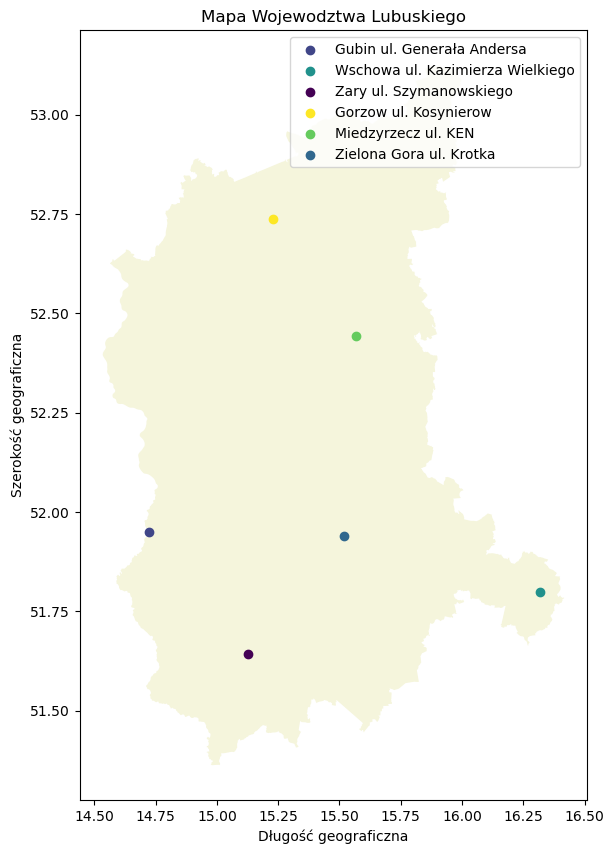

In [17]:
norm_pm25 = Normalize(vmin=min(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25),
                  vmax=max(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25))

# Wybierz mapę kolorów
cmap = plt.get_cmap('viridis')

# Przekształć wartości na intensywność koloru
kolor_Gubin = cmap(norm_pm25(wartosc_Gubin_pm25))
kolor_Wschowa = cmap(norm_pm25(wartosc_Wschowa_pm25))
kolor_Zary = cmap(norm_pm25(wartosc_Zary_pm25))
kolor_Gorz = cmap(norm_pm25(wartosc_Miedz_pm25))
kolor_Miedz = cmap(norm_pm25(wartosc_Gorzow_pm25))
kolor_ZG = cmap(norm_pm25(wartosc_ZG_pm25))

#####################DLA o3 ODKOPMENTOWAĆ I ZAKOMENTOWAĆ RESZTĘ##################################################

# # Znormalizuj wartości do zakresu 0-1
# norm_o3 = Normalize(vmin=min(wartosc_Wschowa_o3, wartosc_Zary_o3),
#                  vmax=max(wartosc_Wschowa_o3, wartosc_Zary_o3))

# # Wybierz mapę kolorów
# cmap = plt.get_cmap('viridis')

# # Przekształć wartości na intensywność koloru
# kolor_Gubin = cmap(norm_o3(wartosc_Gubin_o3))
# kolor_Wschowa = cmap(norm_o3(wartosc_Wschowa_o3))
# kolor_Zary = cmap(norm_o3(wartosc_Zary_o3))

# # Stwórz mapę
# fig, ax = plt.subplots(figsize=(10, 10))
# merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# xGA = 14.724068286506554
# yGA = 51.94894077373222
# Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
# Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

# xKW = 16.317500
# yKW = 51.799722
# Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
# Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

# xZS = 15.127808
# yZS = 51.642656
# Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
# Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='white', marker='o', label='Losowe punkty')

# # Dodaj legendę w prawym górnym rogu
# ax.legend(loc='upper right')
# # Dodaj tytuł i etykiety
# plt.title("Mapa Wojewodztwa Lubuskiego")
# plt.xlabel("Długość geograficzna")
# plt.ylabel("Szerokość geograficzna")

# # Wyświet mapę
# plt.show()

################################################################################################################

# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

xKS = 15.229592971164104
yKS = 52.736798841119096
Lub_Gorz = gpd.GeoDataFrame(geometry=[Point(xKS, yKS)], crs=uklad_docelowy)
Lub_Gorz.plot(ax=ax, color=kolor_Gorz, label='Gorzow ul. Kosynierow')

xMK = 15.56561304016405
yMK = 52.443823725447785
Lub_Miedz = gpd.GeoDataFrame(geometry=[Point(xMK, yMK)], crs=uklad_docelowy)
Lub_Miedz.plot(ax=ax, color=kolor_Miedz, label='Miedzyrzecz ul. KEN')

xZG = 15.518495934448795
yZG = 51.94051852537971
Lub_Ziel = gpd.GeoDataFrame(geometry=[Point(xZG, yZG)], crs=uklad_docelowy)
Lub_Ziel.plot(ax=ax, color=kolor_ZG, label='Zielona Gora ul. Krotka')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='black', marker='o', label='Losowe punkty')

# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper right')
# Dodaj tytuł i etykiety
plt.title("Mapa Wojewodztwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświet mapę
plt.show()

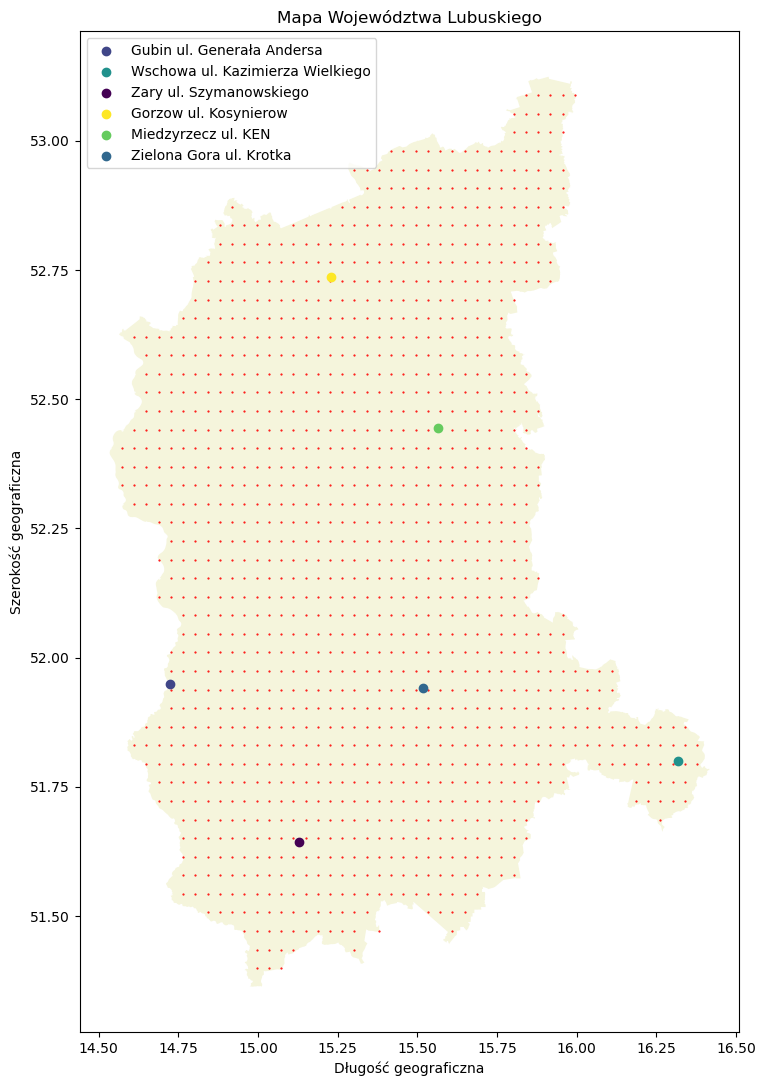

In [18]:
fig, ax = plt.subplots(figsize=(13, 13))
merged_gdf.plot(ax=ax, color='beige')

# Granice mapy merged_gdf
min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# Liczba punktów wzdłuż X i Y
num_points_X = 50  # Dostosuj ilość punktów, jeśli to konieczne
num_points_Y = 50

# Tworzenie równomiernie rozłożonych punktów w obrębie granic mapy
X_points = np.linspace(min_x, max_x, num_points_X)
Y_points = np.linspace(min_y, max_y, num_points_Y)
grid_points = pd.DataFrame([(x, y) for x in X_points for y in Y_points], columns=['Long', 'Latt'])

# Sprawdzenie, czy punkty siatki zawierają się w granicach merged_gdf
grid_points['Within_bounds'] = grid_points.apply(lambda row: merged_gdf.contains(Point(row['Long'], row['Latt'])), axis=1)

# Podział punktów na dwie ramki danych: w granicach i poza granicami
inside_bounds = grid_points[grid_points['Within_bounds']]
outside_bounds = grid_points[~grid_points['Within_bounds']]

# Wyświetlenie punktów w granicach na czerwono, poza granicami na biało
ax.scatter(inside_bounds['Long'], inside_bounds['Latt'], 0.3, color='red')
ax.scatter(outside_bounds['Long'], outside_bounds['Latt'], 0.3, color='white')

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

xKS = 15.229592971164104
yKS = 52.736798841119096
Lub_Gorz = gpd.GeoDataFrame(geometry=[Point(xKS, yKS)], crs=uklad_docelowy)
Lub_Gorz.plot(ax=ax, color=kolor_Gorz, label='Gorzow ul. Kosynierow')

xMK = 15.56561304016405
yMK = 52.443823725447785
Lub_Miedz = gpd.GeoDataFrame(geometry=[Point(xMK, yMK)], crs=uklad_docelowy)
Lub_Miedz.plot(ax=ax, color=kolor_Miedz, label='Miedzyrzecz ul. KEN')

xZG = 15.518495934448795
yZG = 51.94051852537971
Lub_Ziel = gpd.GeoDataFrame(geometry=[Point(xZG, yZG)], crs=uklad_docelowy)
Lub_Ziel.plot(ax=ax, color=kolor_ZG, label='Zielona Gora ul. Krotka')


# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper left')

# Dodaj tytuł i etykiety osi
plt.title("Mapa Województwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")


# Wyświetl mapę
plt.show()


Text(0.5, 0.98, 'Wartosc')

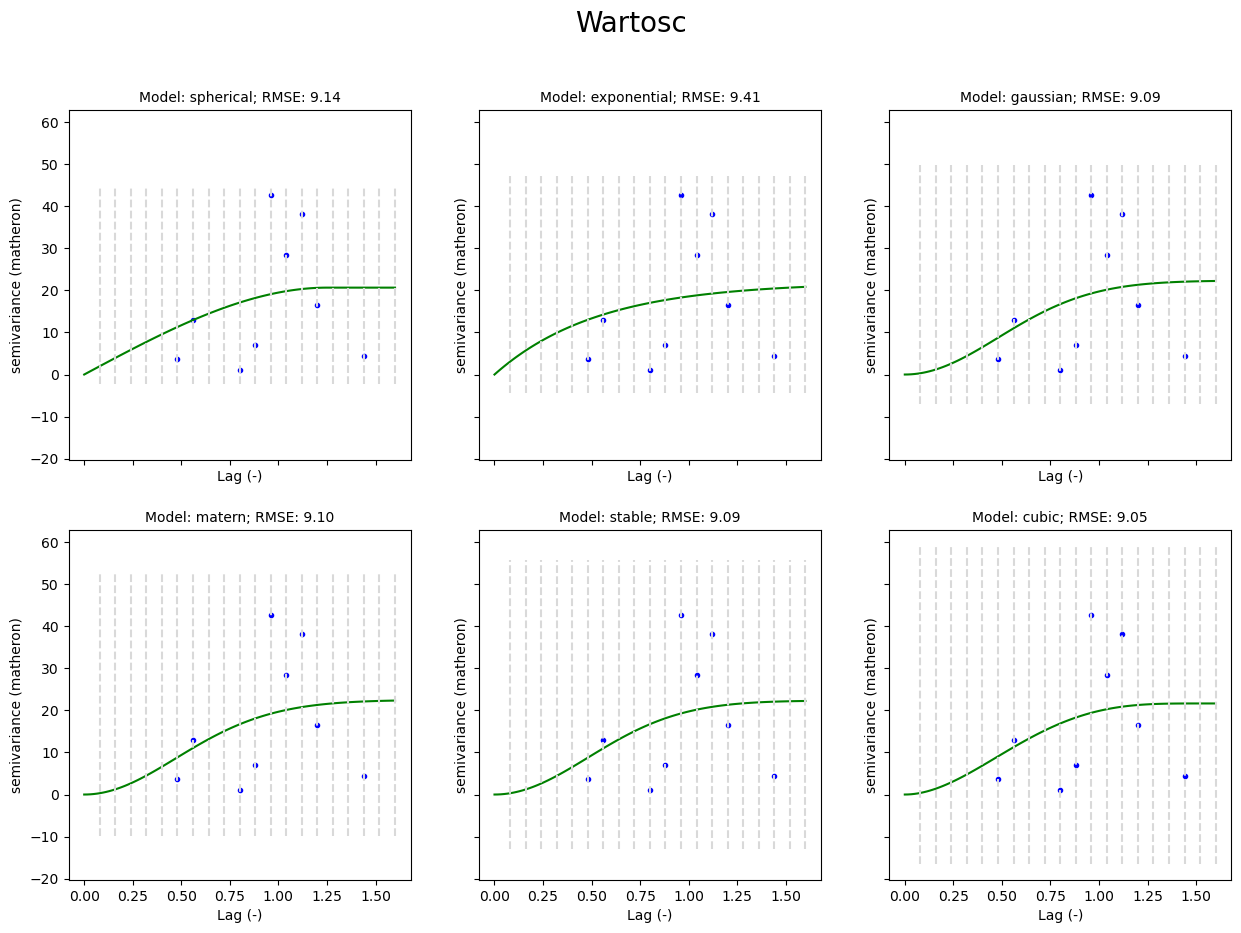

In [7]:
p1Variogram = skg.Variogram(punkty_pm25[['Long', 'Latt']].values, punkty_pm25.Wartosc.values, n_lags=20)

fig, _a = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    p1Variogram.model = model
    p1Variogram.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, p1Variogram.rmse),size=10)
fig.suptitle("Wartosc",size=20)

In [8]:
def interpolate(wartosc, ax,cmap):
    ok_V1 = skg.OrdinaryKriging(wartosc, min_points=5, max_points=15, mode='exact')
    prediction_points = grid_points[['Long', 'Latt']].values

    predicted_wartosc = ok_V1.transform(prediction_points).reshape(50, 50)
    predicted_wartosc = np.rot90(predicted_wartosc, k=1)
    predicted_wartosc = np.flipud(predicted_wartosc)

    art = ax.matshow(predicted_wartosc, origin='lower', vmin=wartosc.values.min(), vmax=wartosc.values.max(),cmap=cmap)
    ax.set_title('%s model' % wartosc.model.__name__)
    plt.colorbar(art, ax=ax)

    return predicted_wartosc

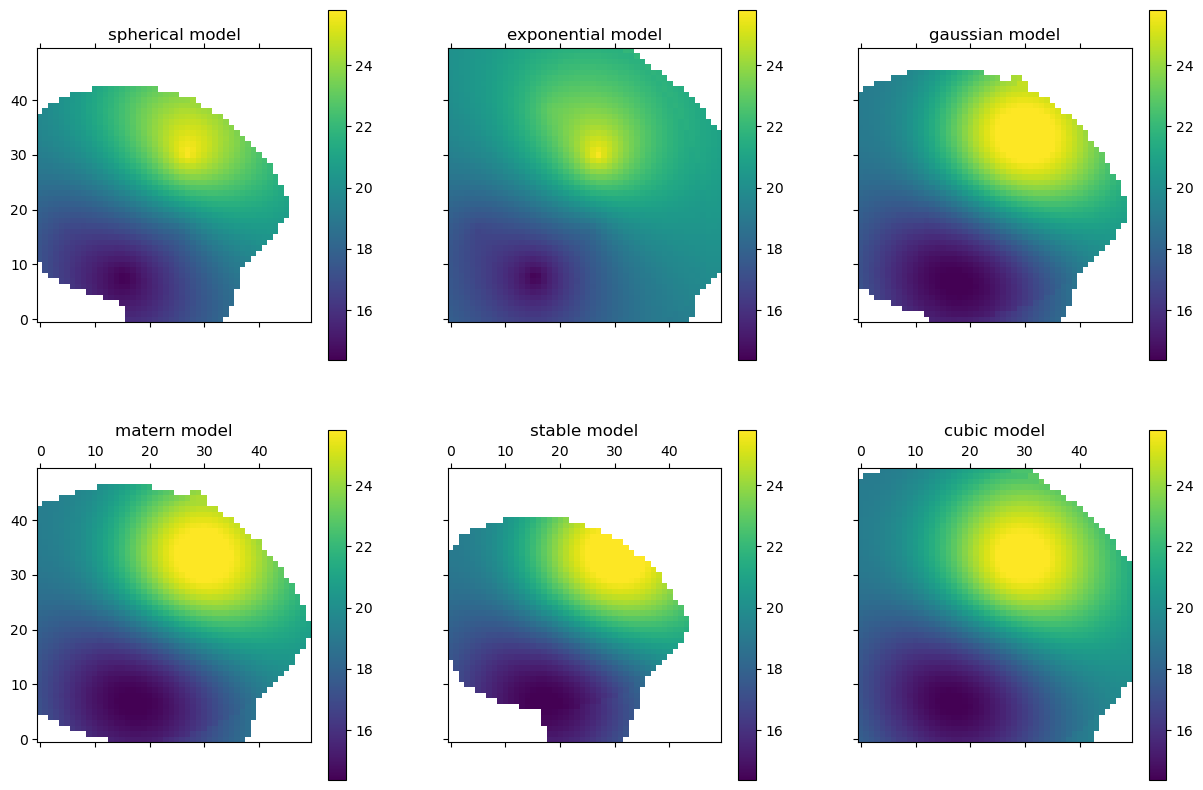

In [9]:
fields = []
fig, _a = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    p1Variogram.model = model
    fields.append(interpolate(p1Variogram, axes[i],'viridis'))

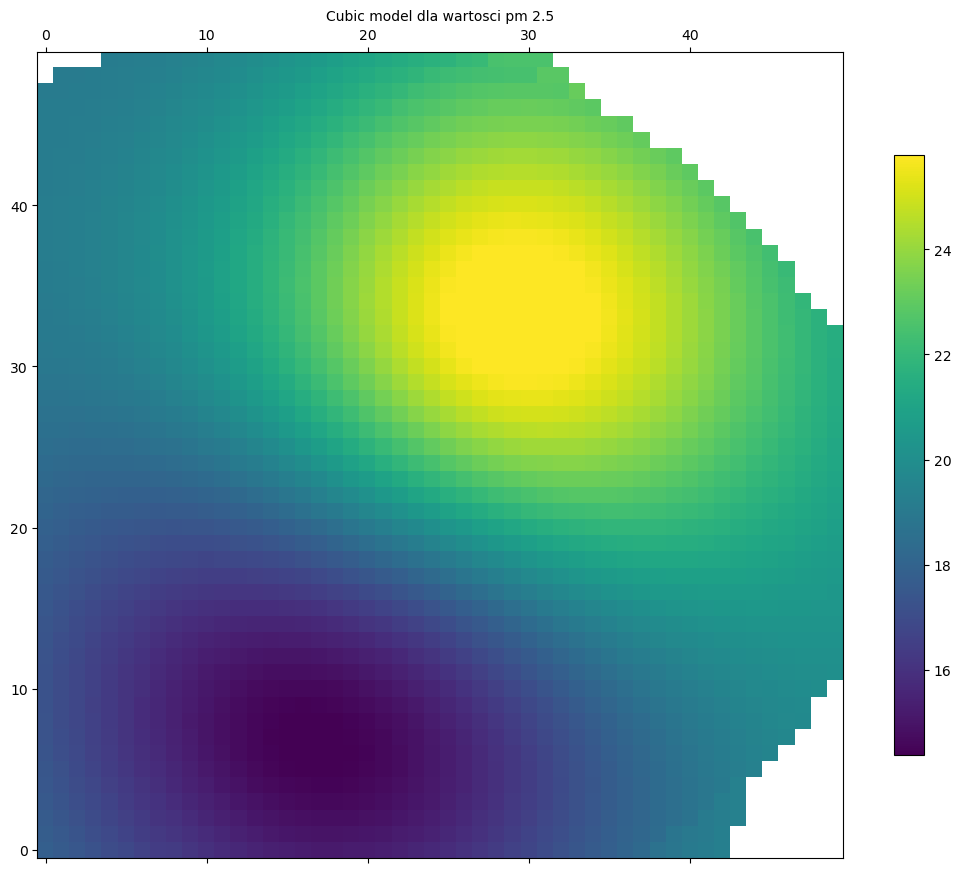

In [10]:
fig, ax = plt.subplots(1,1, figsize=(13, 13))

p1Variogram.model = 'cubic'

wartoscii = skg.OrdinaryKriging(p1Variogram, min_points=5, max_points=15, mode='exact')
prediction_points = grid_points[['Long', 'Latt']].values

predicted_wartoscii = wartoscii.transform(prediction_points).reshape(50, 50)
predicted_wartosci = np.rot90(predicted_wartoscii, k=1)  # 90 stopni w lewo
predicted_wartosci = np.flipud(predicted_wartosci)

art = ax.matshow(predicted_wartosci, origin='lower', vmin=p1Variogram.values.min(), vmax=p1Variogram.values.max())
ax.set_title('Cubic model dla wartosci pm 2.5',size=10)
plt.colorbar(art, ax=ax,shrink=0.6)

In [11]:
predicted_wartoscii = np.rot90(predicted_wartoscii, k=1)
DataF = pd.DataFrame(predicted_wartoscii)

DataF.columns = grid_points.iloc[:,0].unique()
DataF.index = sorted(grid_points.iloc[:, 1].unique(), reverse=True)

predicted_wartoscii = pd.DataFrame(DataF.stack(dropna=False)).reset_index()
predicted_wartoscii.columns = ['Latt','Long','wartosc']

In [12]:
predicted_wartoscii

,Latt,Long,wartosc
0,53.123972,14.534207,NaN
1,53.123972,14.572628,NaN
2,53.123972,14.611049,NaN
3,53.123972,14.649470,NaN
4,53.123972,14.687891,19.169321
...,...,...,...
2495,51.363189,16.263156,NaN
2496,51.363189,16.301577,NaN
2497,51.363189,16.339998,NaN
2498,51.363189,16.378419,NaN


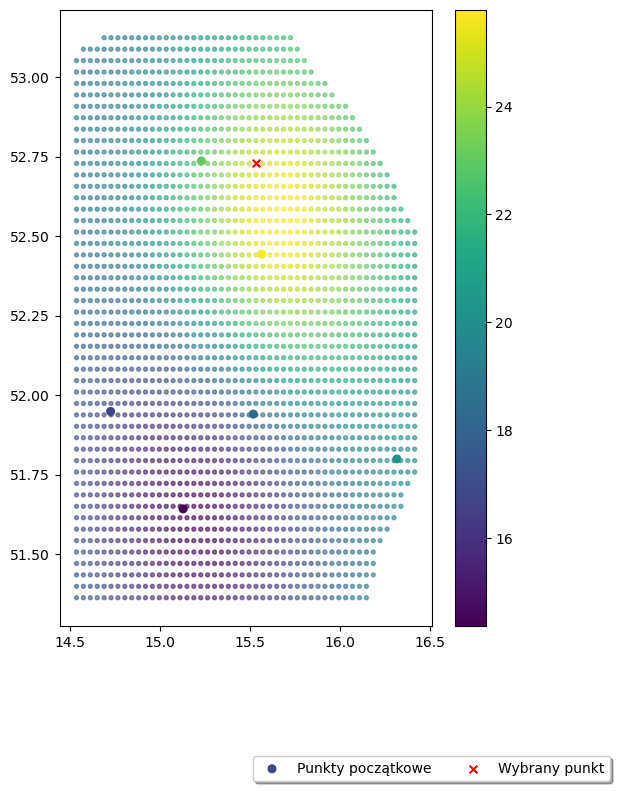

In [13]:
import random

# Znajdź losowy indeks wiersza w ramce danych
random_index = random.randint(0, len(predicted_wartoscii) - 1)

# Pobierz wartości Long i Latt z losowego wiersza
random_Long = predicted_wartoscii.iloc[random_index]['Long']
random_Latt = predicted_wartoscii.iloc[random_index]['Latt']
fig, ax = plt.subplots(1, 1, figsize=(6, 8), sharex=True, sharey=True)

scatter_plot_wartosci = ax.scatter(predicted_wartoscii['Long'], predicted_wartoscii['Latt'], s=8, c=predicted_wartoscii['wartosc'], alpha=0.6)
actual_wartosc = ax.scatter(punkty_pm25.iloc[:, 1], punkty_pm25.iloc[:, 2], c=punkty_pm25.Wartosc, s=30, label='Punkty początkowe')
ax.scatter(random_Long, random_Latt, c='red', s=30, marker='x', label='Wybrany punkt')

plt.colorbar(actual_wartosc,ax=ax)

ax.legend(loc='upper left', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

plt.show()

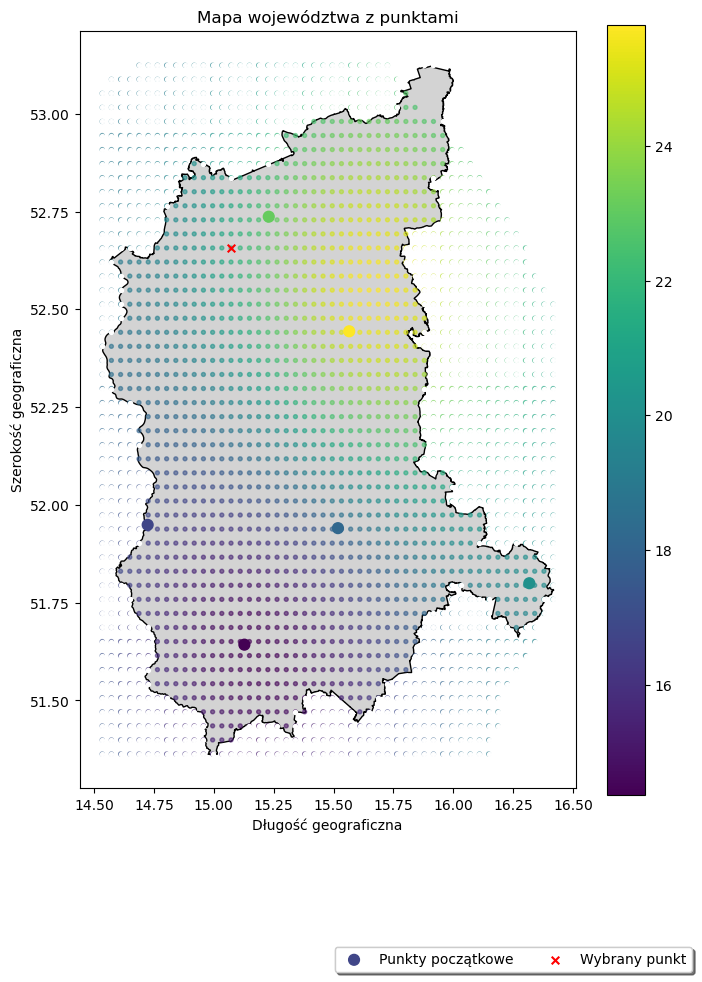

Latt       52.656826
Long       15.072102
wartosc    21.836682
Name: 664, dtype: float64


In [14]:
# Tworzenie wykresu mapy województwa
fig, ax = plt.subplots(figsize=(8, 10))
merged_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Sprawdzenie i wybór losowego punktu w granicach województwa
while True:
    random_index = random.randint(0, len(predicted_wartoscii) - 1)
    random_point = Point(predicted_wartoscii.iloc[random_index]['Long'], predicted_wartoscii.iloc[random_index]['Latt'])
    if merged_gdf.geometry.contains(random_point).any():
        break

# Pobierz wartości Long i Latt z wybranego losowego punktu
random_Long = predicted_wartoscii.iloc[random_index]['Long']
random_Latt = predicted_wartoscii.iloc[random_index]['Latt']

# Wyświetlanie punktów na mapie w granicach
scatter_inside = ax.scatter(predicted_wartoscii['Long'], predicted_wartoscii['Latt'], s=8, c=predicted_wartoscii['wartosc'], alpha=0.6)
actual_wartosc = ax.scatter(punkty_pm25.iloc[:, 1], punkty_pm25.iloc[:, 2], c=punkty_pm25.Wartosc, s=60, label='Punkty początkowe')
ax.scatter(random_Long, random_Latt, c='red', s=30, marker='x', label='Wybrany punkt')

# Wyświetlanie punktów poza granicami województwa na biało
outside_points = []
for index, row in predicted_wartoscii.iterrows():
    point = Point(row['Long'], row['Latt'])
    if not merged_gdf.geometry.contains(point).any():
        outside_points.append(row)

if outside_points:
    outside_df = pd.DataFrame(outside_points)
    ax.scatter(outside_df['Long'], outside_df['Latt'], c='white', s=8)

# Dodawanie legendy
plt.colorbar(actual_wartosc, ax=ax)
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)
plt.gca().add_artist(legend)

# Dodawanie tytułu i etykiet osi
plt.title("Mapa województwa z punktami")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświetlanie mapy
plt.show()
print(predicted_wartoscii.iloc[random_index])